<a href="https://colab.research.google.com/github/abdulxs/Advanced-Deep-Learning-Projects/blob/main/6.%20Numerical_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerical Data Augmentation

Implementation of numerical data augmentation with the following methods:
Using SMOTE and Borderline-SMOTE methods to oversample binary classification dataset
‘Imbalanced_data.csv’, compare the results with plotting figures.
Note:
1. Install “imbalanced-learn” library to import SMOTE series methods in Python.
2. For the dataset, the first two columns are the coordinates and the last column is the class, which
contains 0 and 1

In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Original class distribution: Counter({0.0: 7914, 1.0: 85})
Confusion Matrix:
 [[1984    1]
 [  10    5]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1985
         1.0       0.83      0.33      0.48        15

    accuracy                           0.99      2000
   macro avg       0.91      0.67      0.74      2000
weighted avg       0.99      0.99      0.99      2000



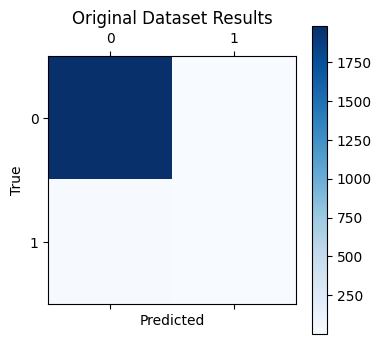

Class distribution after SMOTE: Counter({0.0: 7914, 1.0: 7914})
Confusion Matrix:
 [[1878  107]
 [   5   10]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1985
         1.0       0.09      0.67      0.15        15

    accuracy                           0.94      2000
   macro avg       0.54      0.81      0.56      2000
weighted avg       0.99      0.94      0.96      2000



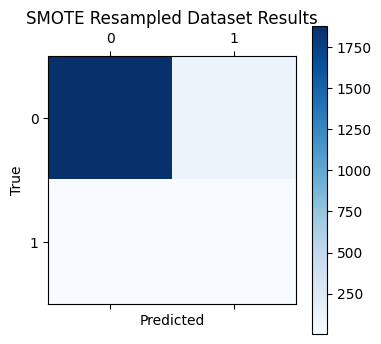

Class distribution after Borderline-SMOTE: Counter({0.0: 7914, 1.0: 7914})
Confusion Matrix:
 [[1967   18]
 [   5   10]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1985
         1.0       0.36      0.67      0.47        15

    accuracy                           0.99      2000
   macro avg       0.68      0.83      0.73      2000
weighted avg       0.99      0.99      0.99      2000



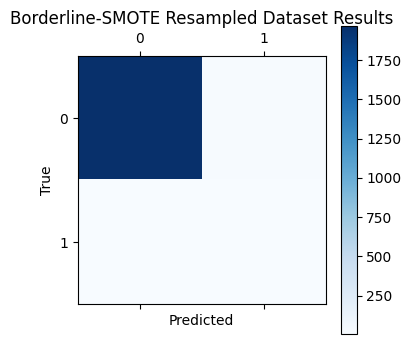

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter

# Load the imbalanced dataset
df = pd.read_csv('/content/Imbalanced Dataset.csv')

# Separate features (X) and target variable (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Original class distribution
print("Original class distribution:", Counter(y_train))

# Function to evaluate and plot classification results
def evaluate_and_plot(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(4, 4))
    cax = ax.matshow(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues)
    fig.colorbar(cax)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Train and evaluate a model on the original dataset
original_model = RandomForestClassifier(random_state=42)
original_model.fit(X_train, y_train)
evaluate_and_plot(original_model, X_test, y_test, "Original Dataset Results")

# Oversample the training set using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# Train and evaluate a model on the SMOTE-resampled dataset
smote_model = RandomForestClassifier(random_state=42)
smote_model.fit(X_resampled, y_resampled)
evaluate_and_plot(smote_model, X_test, y_test, "SMOTE Resampled Dataset Results")

# Oversample the training set using Borderline-SMOTE
borderline_smote = BorderlineSMOTE(random_state=42)
X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X_train, y_train)

# Class distribution after Borderline-SMOTE
print("Class distribution after Borderline-SMOTE:", Counter(y_resampled_borderline))

# Train and evaluate a model on the Borderline-SMOTE-resampled dataset
borderline_smote_model = RandomForestClassifier(random_state=42)
borderline_smote_model.fit(X_resampled_borderline, y_resampled_borderline)
evaluate_and_plot(borderline_smote_model, X_test, y_test, "Borderline-SMOTE Resampled Dataset Results")
